<a href="https://colab.research.google.com/github/riccardotenuta/network_science/blob/main/network_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

!chmod 600 ~/.kaggle/kaggle.json

# option 1 karkavelrajaj/amazon-sales-dataset
# option 2 gabrielramos87/an-online-shop-business
# option 3 arhamrumi/amazon-product-reviews
# option 4 ahmedsayed564/amazon-sales-dataset
# option 5 mohamedbakhet/amazon-books-reviews/

!kaggle datasets download -d mohamedbakhet/amazon-books-reviews -p /content/drive/MyDrive/
!unzip /content/drive/MyDrive/amazon-books-reviews.zip -d /content/drive/MyDrive/

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 74 Dec  6 16:48 kaggle.json
/content
Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
 99% 1.06G/1.06G [00:13<00:00, 117MB/s] 
100% 1.06G/1.06G [00:13<00:00, 84.2MB/s]
Archive:  /content/drive/MyDrive/amazon-books-reviews.zip
  inflating: /content/drive/MyDrive/Books_rating.csv  
  inflating: /content/drive/MyDrive/books_data.csv  


In [ ]:
!pip install node2vec

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
reviews = pd.read_csv('/content/drive/MyDrive/Books_rating.csv')
book_data = pd.read_csv('/content/drive/MyDrive/books_data.csv')

In [ ]:
reviews.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [ ]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
dataset = pd.merge(reviews, book_data, on='Title')
dataset.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN


In [ ]:
len(dataset)

3000000

### Data exploration and visualization

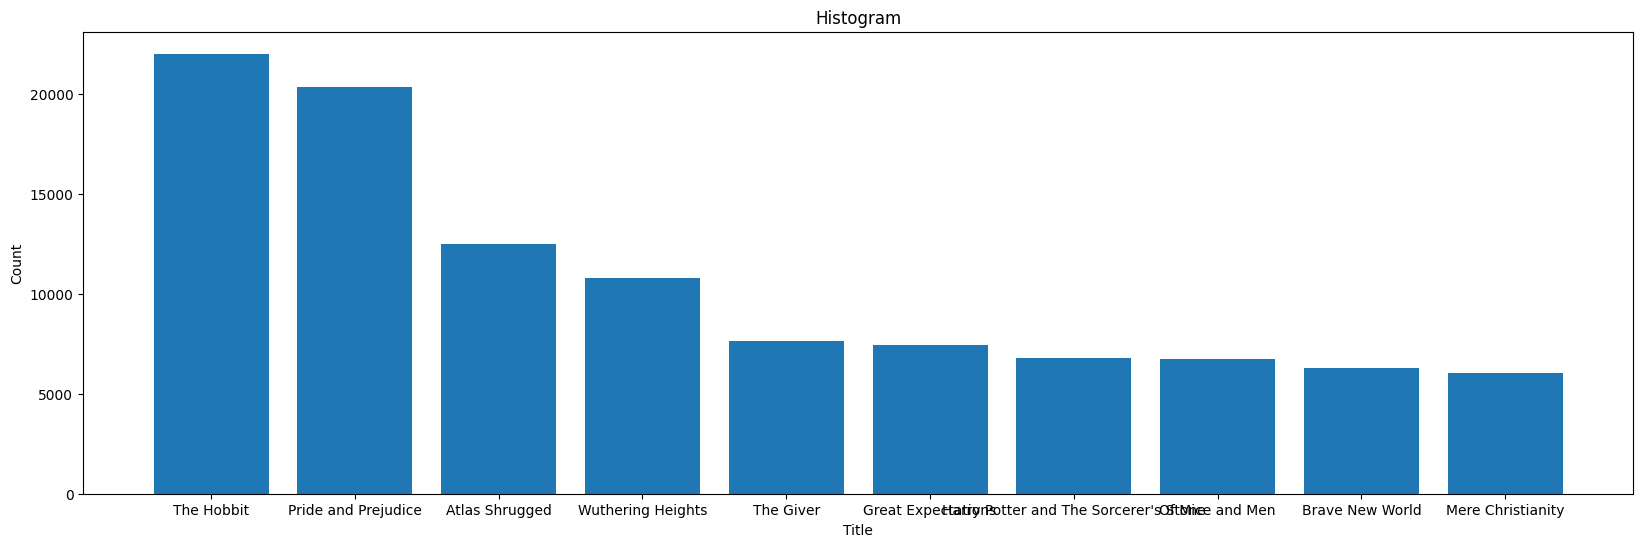

                                        Title  count
166774                             The Hobbit  22023
123882                    Pride and Prejudice  20371
17627                          Atlas Shrugged  12513
210378                      Wuthering Heights  10780
164672                              The Giver   7644
67539                      Great Expectations   7421
70372   Harry Potter and The Sorcerer's Stone   6796
113065                        Of Mice and Men   6728
26051                         Brave New World   6312
102197                      Mere Christianity   6053


In [ ]:
## Dataset visulization

most_purchased = dataset.groupby(['Title']).size().reset_index(name='count').sort_values(['count'], ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(most_purchased['Title'][:10], most_purchased['count'][:10])
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Histogram')
plt.show()

print(most_purchased[:10])

### Data preparation


In [ ]:
net = dataset.sample(frac=0.01, random_state=42, replace=False)
net.info()

print(len(net))

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 2945667 to 2414791
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  30000 non-null  object 
 1   Title               29999 non-null  object 
 2   Price               4739 non-null   float64
 3   User_id             24466 non-null  object 
 4   profileName         24465 non-null  object 
 5   review/helpfulness  30000 non-null  object 
 6   review/score        30000 non-null  float64
 7   review/time         30000 non-null  int64  
 8   review/summary      29995 non-null  object 
 9   review/text         30000 non-null  object 
 10  description         23403 non-null  object 
 11  authors             25955 non-null  object 
 12  image               24460 non-null  object 
 13  previewLink         26551 non-null  object 
 14  publisher           21999 non-null  object 
 15  publishedDate       26292 non-null  object 
 16  i

In [ ]:
# only books that have been liked by the same users
net = net[net['review/score'] >= 4]
net.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23920 entries, 2945667 to 2414791
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  23920 non-null  object 
 1   Title               23919 non-null  object 
 2   Price               3790 non-null   float64
 3   User_id             19640 non-null  object 
 4   profileName         19639 non-null  object 
 5   review/helpfulness  23920 non-null  object 
 6   review/score        23920 non-null  float64
 7   review/time         23920 non-null  int64  
 8   review/summary      23916 non-null  object 
 9   review/text         23920 non-null  object 
 10  description         18600 non-null  object 
 11  authors             20691 non-null  object 
 12  image               19456 non-null  object 
 13  previewLink         21169 non-null  object 
 14  publisher           17458 non-null  object 
 15  publishedDate       20977 non-null  object 
 16  i

In [ ]:
from collections import defaultdict

pairs = defaultdict(int)

net = net.drop_duplicates(subset=['Title', 'User_id'], keep='first')

for group in net.groupby("User_id"):
    user_books = list(group[1]["Title"])
    for i in range(len(user_books)):
        for j in range(i+1, len(user_books)):
            pairs[(user_books[i], user_books[j])] += 1

# creating graph
G = nx.Graph()

for pair in pairs:
    p1, p2 = pair
    weight = pairs[pair]
    title1 = net[net['Title'] == p1]['Title'].values[0]
    title2 = net[net['Title'] == p2]['Title'].values[0]
    G.add_node(p1, title=title1)
    G.add_node(p2, title=title2)

    # add edge
    G.add_edge(p1, p2, weight=weight)

print(G)

Graph with 2217 nodes and 5929 edges


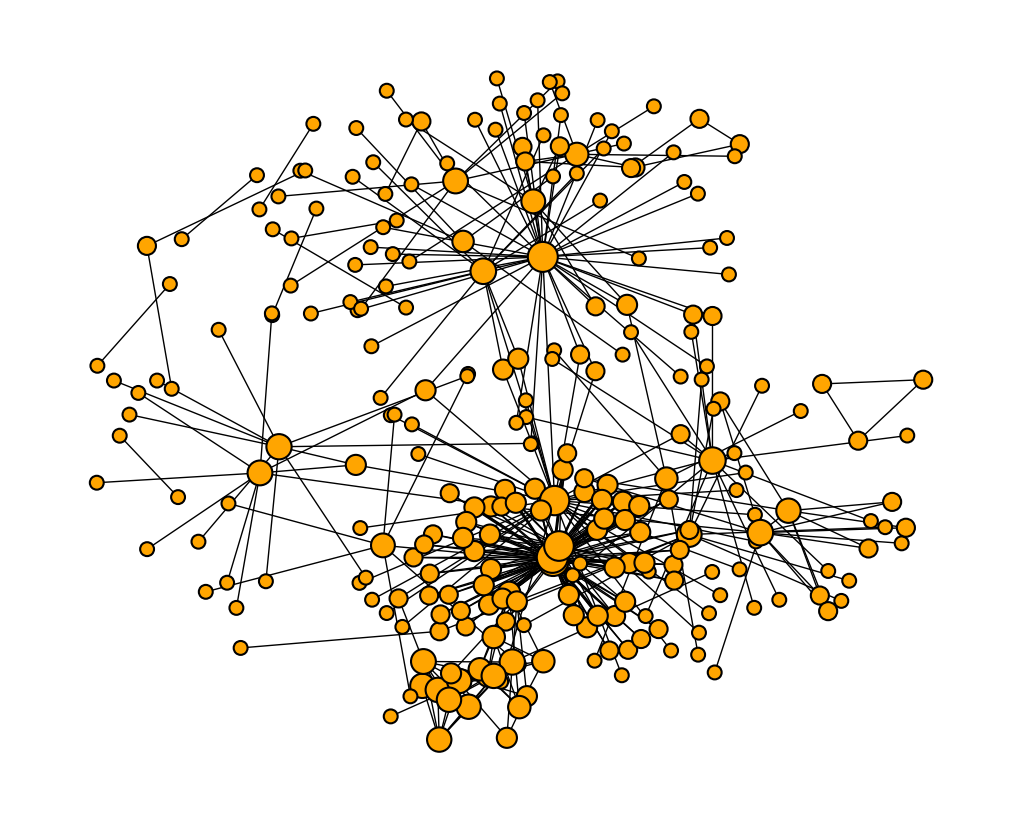

In [ ]:
import math

# visualize the graph

subgraph = G.edge_subgraph(list(G.edges())[:400])

pos = nx.fruchterman_reingold_layout(subgraph, k = 1, iterations=200)
degrees = dict(subgraph.degree())
node_sizes = [100 * (1 + math.log(v)) for v in degrees.values()]
plt.figure(figsize=(10, 8))
nx.draw(subgraph, pos, node_size=node_sizes, node_color='orange', edge_color='black', font_size=10, node_shape='o', linewidths=1.5, edgecolors='black')

plt.show()

In [ ]:
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 2217
Number of edges: 5929


In [ ]:
density = nx.density(G)
density

0.0024136594643621896

In [ ]:
nodes_degrees = list(dict(G.degree()).values())

print('Average degree: {:.2f}'.format(np.mean(nodes_degrees)))
print(f'Median degree: {np.median(nodes_degrees)}')
print(f'Maximum degree: {max(nodes_degrees)}')
print(f'Minimum degree: {min(nodes_degrees)}')
print('Standard deviation: {:.2f}'.format(np.std(nodes_degrees)))

Average degree: 5.35
Median degree: 2.0
Maximum degree: 79
Minimum degree: 1
Standard deviation: 10.02


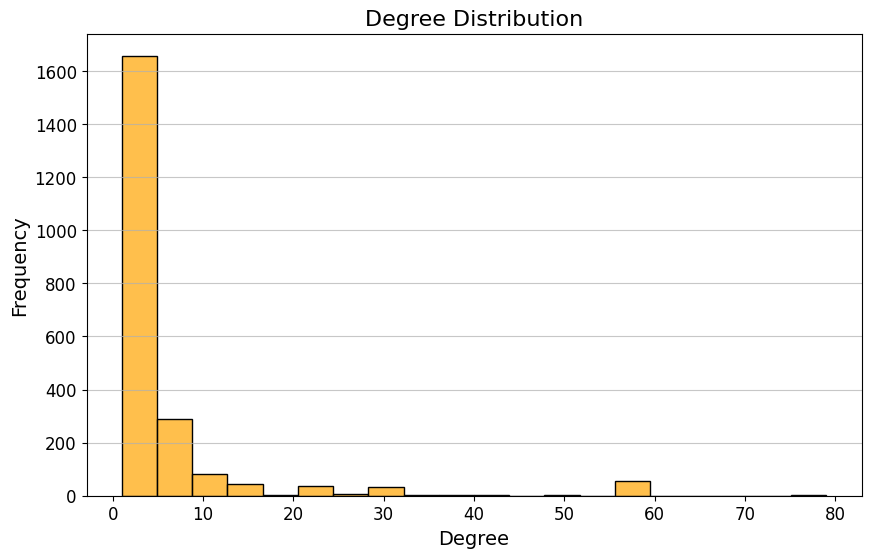

In [ ]:
# Plot the degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(nodes_degrees, bins=20, kde=False, color='orange', edgecolor='black', alpha=0.7)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Degree Distribution', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'ECDF plot - Linear scale')

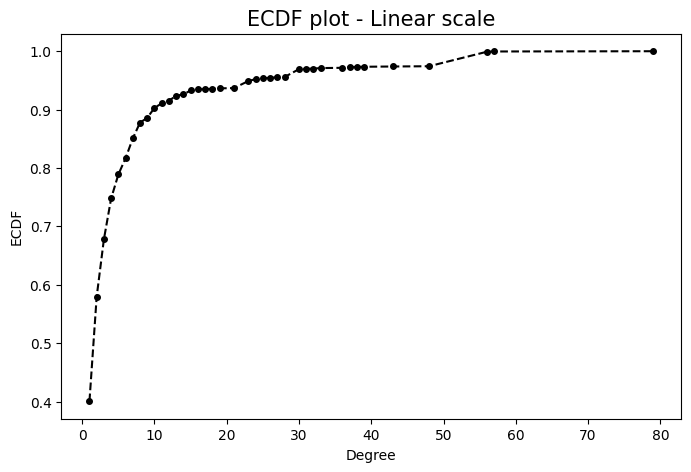

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

cdf_function = ECDF(nodes_degrees)
x = np.unique(nodes_degrees)
y = cdf_function(x)

fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.plot(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 4)
axes.set_xlabel('Degree', size = 10)
axes.set_ylabel('ECDF', size = 10)
axes.set_title("ECDF plot - Linear scale", size=15)

Text(0.5, 1.0, 'ECDF plot - Log scale')

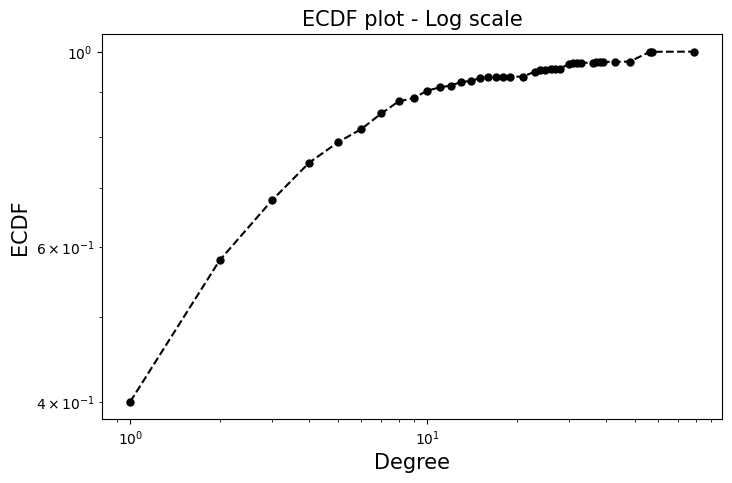

In [ ]:
fig_cdf_function = plt.figure(figsize=(8,5))
axes = fig_cdf_function.gca()
axes.loglog(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 5)
axes.set_xlabel('Degree', size = 15)
axes.set_ylabel('ECDF', size = 15)
axes.set_title("ECDF plot - Log scale", size=15)

Text(0.5, 1.0, 'ECCDF - Log scale')

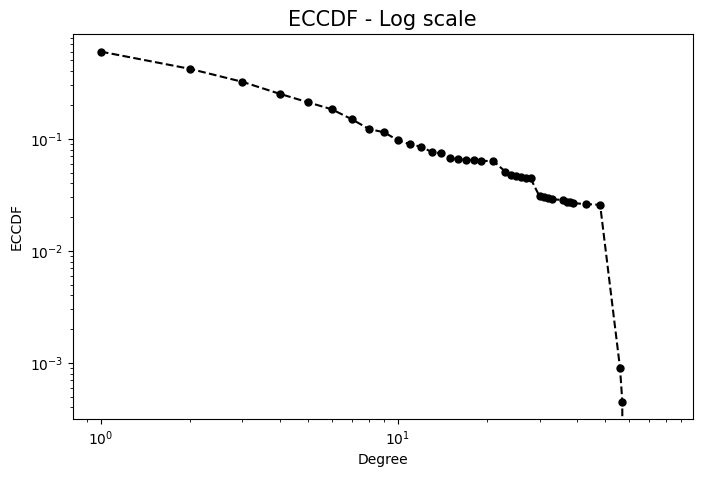

In [ ]:
y = 1 - cdf_function(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x, y, color = 'black', linestyle = '--', marker = 'o',ms = 5)
axes.set_xlabel('Degree', size = 10)
axes.set_ylabel('ECCDF', size = 10)
axes.set_title("ECCDF - Log scale", size = 15)

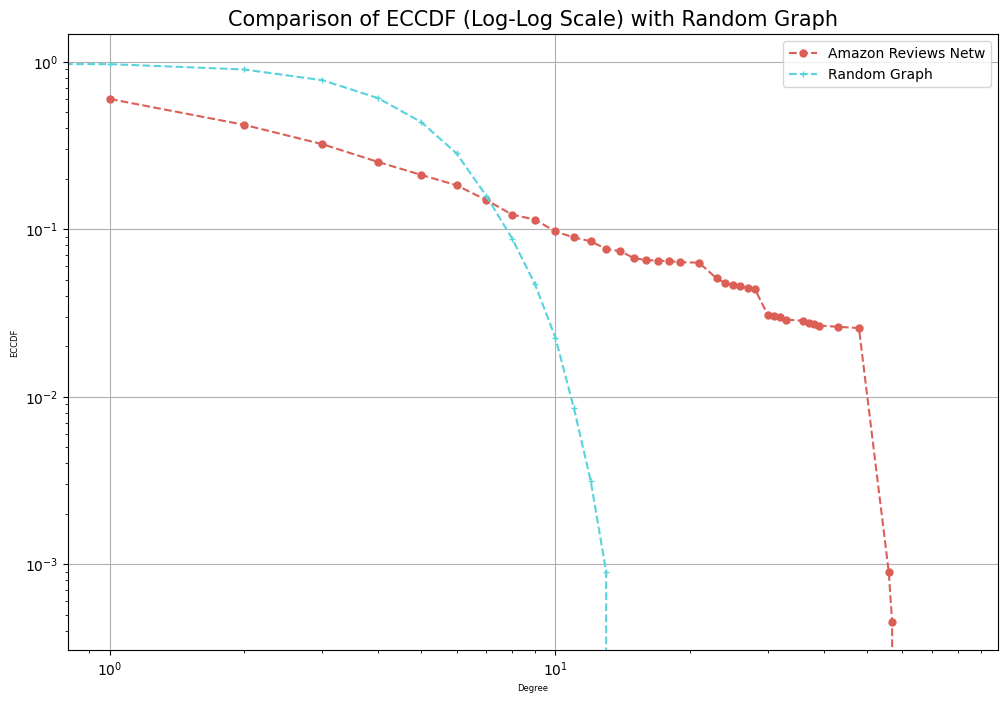

In [ ]:
# Generate a random graph with the same number of nodes and approximately the same number of edges
n_nodes = len(G.nodes)
n_edges = len(G.edges)
p = n_edges / (n_nodes * (n_nodes - 1) / 2)  # Edge probability for Erdős–Rényi model

random_graph = nx.erdos_renyi_graph(n_nodes, p)

# Calculate degree and ECCDF for the random graph
random_degrees = dict(random_graph.degree())
random_degree_values = list(random_degrees.values())
random_cdf_function = ECDF(random_degree_values)
random_eccdf_y = 1 - random_cdf_function(np.unique(random_degree_values))

plt.figure(figsize=(12, 8))
palette = sns.color_palette("hls", n_colors=4)

# Plot ECCDF
plt.loglog(x, y, color=palette[0], linestyle='--', marker='o', ms=5, label='Amazon Reviews Netw')

# Plot ECCDFfor rn
plt.loglog(np.unique(random_degree_values), random_eccdf_y, color=palette[2], linestyle='--', marker='+', ms=5, label='Random Graph')

plt.xlabel('Degree', size=6)
plt.ylabel('ECCDF', size=6)
plt.title('Comparison of ECCDF (Log-Log Scale) with Random Graph', size=15)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# degree centrality
degree_centrality = nx.degree_centrality(G)
d_central = max(degree_centrality,key=degree_centrality.get)

print("Node with highest degree centrality:", d_central)
print("Degree centrality value: {:.3f}".format(degree_centrality[d_central]))

d_central

Node with highest degree centrality: Anansi Boys
Degree centrality value: 0.036


'Anansi Boys'

In [ ]:
# degree centrality
betweenness_centrality = nx.betweenness_centrality(G)
b_central = max(betweenness_centrality, key=betweenness_centrality.get)
betweenness_centrality
print("Node with highest degree centrality:", b_central)
print("Degree centrality value:", betweenness_centrality[b_central])

b_central

Node with highest degree centrality: The Picture of Dorian Gray
Degree centrality value: 0.04295654915476846


'The Picture of Dorian Gray'

In [ ]:
# closeness centrality
closeness_centrality = nx.closeness_centrality(G)
c_central = max(closeness_centrality,key=closeness_centrality.get)
print("Node with highest degree centrality:", c_central)
print("Degree centrality value:", closeness_centrality[c_central])

c_central

Node with highest degree centrality: The Picture of Dorian Gray
Degree centrality value: 0.11713046876558232


'The Picture of Dorian Gray'

In [ ]:
# eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
e_central = max(eigenvector_centrality,key=eigenvector_centrality.get)
print("Node with highest degree centrality:", e_central)
print("Degree centrality value:", eigenvector_centrality[e_central])

e_central

Node with highest degree centrality: Anansi Boys
Degree centrality value: 0.13399538266411604


'Anansi Boys'

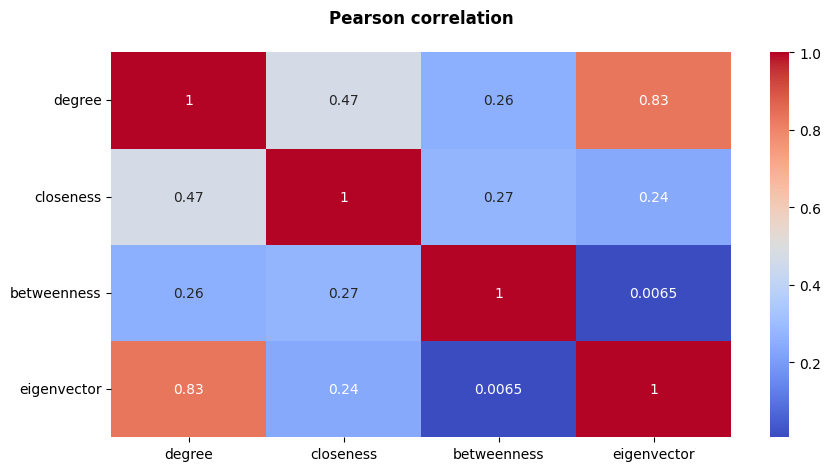

In [ ]:
import scipy

all_centr = [degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality]
corrs = [[scipy.stats.pearsonr(list(c1.values()), list(c2.values()))[0] for c1 in all_centr] for c2 in all_centr]
centralities = ['degree', 'closeness','betweenness','eigenvector']

plt.figure(figsize = (10,5))
sns.heatmap(pd.DataFrame(corrs),annot = True,cmap = 'coolwarm')
plt.xticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.yticks([x+0.5 for x in range(4)],centralities, rotation = 0)
plt.title('Pearson correlation\n', weight = 'bold')
plt.show()

In [ ]:
# Calculate and display top 5 degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_degree_centrality = sorted_degree_centrality[:5]
print("\nTop 5 Degree Centrality:")
for node, centrality in top_5_degree_centrality:
    title = G.nodes[node]['title']
    print(f"Book: {title}, Degree Centrality: {centrality:.4f}")

# Calculate and display top 5 betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_betweenness_centrality = sorted_betweenness_centrality[:5]
print("\nTop 5 Betweenness Centrality:")
for node, centrality in top_5_betweenness_centrality:
    title = G.nodes[node]['title']
    print(f"Book: {title}, Betweenness Centrality: {centrality:.4f}")

# Calculate and display top 5 closeness centrality
closeness_centrality = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_closeness_centrality = sorted_closeness_centrality[:5]
print("\nTop 5 Closeness Centrality:")
for node, centrality in top_5_closeness_centrality:
    title = G.nodes[node]['title']
    print(f"Book: {title}, Closeness Centrality: {centrality:.4f}")

# Calculate and display top 5 eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_eigenvector_centrality = sorted_eigenvector_centrality[:5]
print("\nTop 5 Eigenvector Centrality:")
for node, centrality in top_5_eigenvector_centrality:
    title = G.nodes[node]['title']
    print(f"Book: {title}, Eigenvector Centrality: {centrality:.4f}")


Top 5 Degree Centrality:
Book: Anansi Boys, Degree Centrality: 0.0356
Book: Alice's Adventures in Wonderland, Degree Centrality: 0.0257
Book: Stories of Hope and Spirit, Degree Centrality: 0.0253
Book: Eternal Seasons: A Liturgical Journey with Henri J.M. Nouwen, Degree Centrality: 0.0253
Book: The Beast of Bray Road: Tailing Wisconsin's Werewolf, Degree Centrality: 0.0253

Top 5 Betweenness Centrality:
Book: The Picture of Dorian Gray, Betweenness Centrality: 0.0430
Book: Pride and Prejudice, Betweenness Centrality: 0.0429
Book: Wuthering Heights, Betweenness Centrality: 0.0274
Book: Great Expectations, Betweenness Centrality: 0.0192
Book: Anansi Boys, Betweenness Centrality: 0.0188

Top 5 Closeness Centrality:
Book: The Picture of Dorian Gray, Closeness Centrality: 0.1171
Book: Pride and Prejudice, Closeness Centrality: 0.1154
Book: Wuthering Heights, Closeness Centrality: 0.1093
Book: Little Women, Closeness Centrality: 0.1083
Book: The Hobbit, Closeness Centrality: 0.1052

Top 5 E

In [ ]:
# Calculate connected components
connected_components = list(nx.connected_components(G))

# Display sizes of connected components
component_sizes = [len(comp) for comp in connected_components]
print(f"Number of Connected Components: {len(connected_components)}")
print(f"Sizes of Connected Components: {component_sizes}")

Number of Connected Components: 500
Sizes of Connected Components: [868, 3, 2, 2, 5, 2, 3, 2, 2, 4, 2, 6, 2, 2, 2, 2, 4, 2, 2, 3, 2, 7, 12, 5, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 5, 3, 2, 2, 6, 2, 2, 3, 2, 8, 2, 2, 4, 2, 2, 3, 2, 2, 2, 5, 3, 2, 8, 2, 2, 2, 10, 2, 2, 2, 4, 6, 3, 2, 2, 3, 4, 4, 3, 5, 2, 2, 3, 14, 2, 2, 3, 2, 4, 2, 2, 2, 4, 2, 5, 2, 2, 2, 2, 4, 2, 2, 2, 3, 5, 2, 3, 4, 3, 2, 4, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 3, 2, 4, 5, 2, 4, 4, 8, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 6, 2, 9, 2, 4, 4, 2, 2, 3, 2, 3, 3, 2, 3, 2, 9, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 6, 2, 2, 2, 3, 4, 2, 2, 2, 2, 5, 2, 2, 11, 2, 2, 2, 2, 2, 2, 4, 5, 2, 2, 2, 2, 2, 2, 3, 2, 6, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 5, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 6, 2, 2, 2, 4, 6, 2, 3, 2, 2, 2, 5, 2, 3,

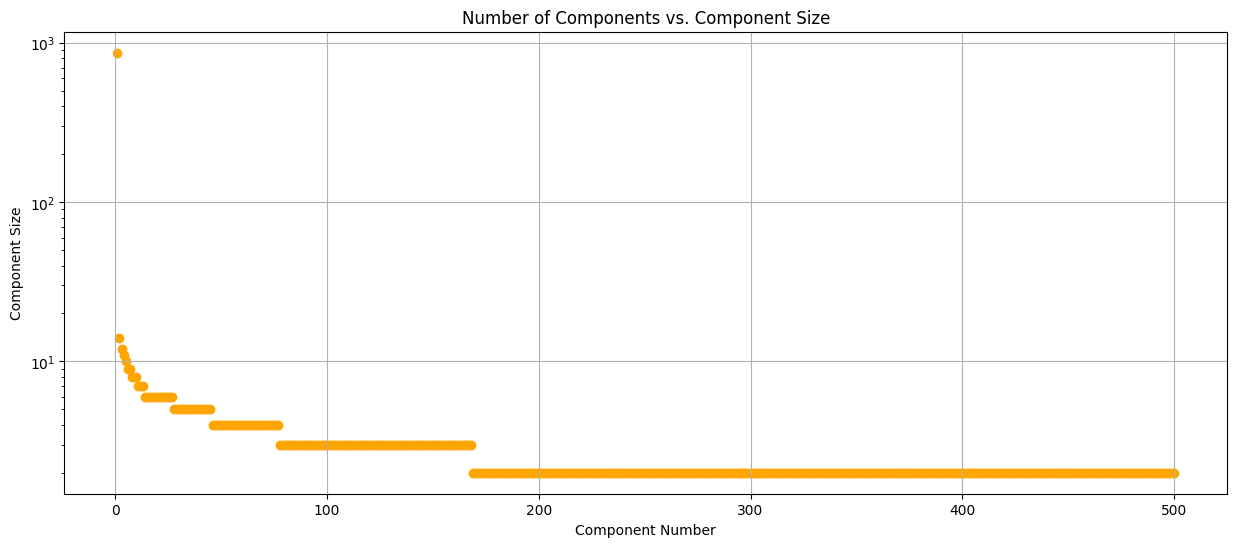

In [ ]:
# Get the number of components and the size of each component
num_components = len(connected_components)
component_sizes = [len(component) for component in connected_components]

# Plot the number of components against the component size
plt.figure(figsize=(15, 6))
plt.scatter(range(1, num_components + 1), sorted(component_sizes, reverse=True), color='orange', marker='o')
plt.xlabel('Component Number')
plt.ylabel('Component Size')
plt.yscale("log")

plt.title('Number of Components vs. Component Size')
plt.grid(True)
plt.show()

In [ ]:
connected_components[499]

{'Balzac and the Little Chinese Seamstress', 'Push: A Novel'}

In [ ]:
# diameter of biggest component
largest_connected_component = max(connected_components, key=len)
component1 = G.subgraph(largest_connected_component)

diameter = nx.diameter(component1)

print(f"Diameter of the largest connected component: {diameter}")

Diameter of the largest connected component: 14


In [ ]:
# bridges
bridges = list(nx.bridges(G))

total_edges = G.number_of_edges()
percentage_bridges = (len(bridges) / total_edges) * 100

print(f"Number of bridges: {len(bridges)}")
print(f"Percentage bridges: {percentage_bridges:.1f}%")

Number of bridges: 603
Percentage bridges: 10.2%


In [ ]:
# Calculate clustering coefficients
local_clustering_coefficients = nx.clustering(G)
average_local_clustering_coefficient = sum(local_clustering_coefficients.values()) / len(G)
print(f"Average Local Clustering Coefficient: {average_local_clustering_coefficient:.4f}")

global_clustering_coefficient = nx.average_clustering(G)
print(f"Global Clustering Coefficient: {global_clustering_coefficient:.4f}")

Average Local Clustering Coefficient: 0.5169
Global Clustering Coefficient: 0.5169


In [ ]:
# assortativity

assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity of the degree: {assortativity}")

Assortativity of the degree: 0.9304911892512243


In [ ]:
from community import community_louvain as louvain

partitions = louvain.best_partition(subgraph)

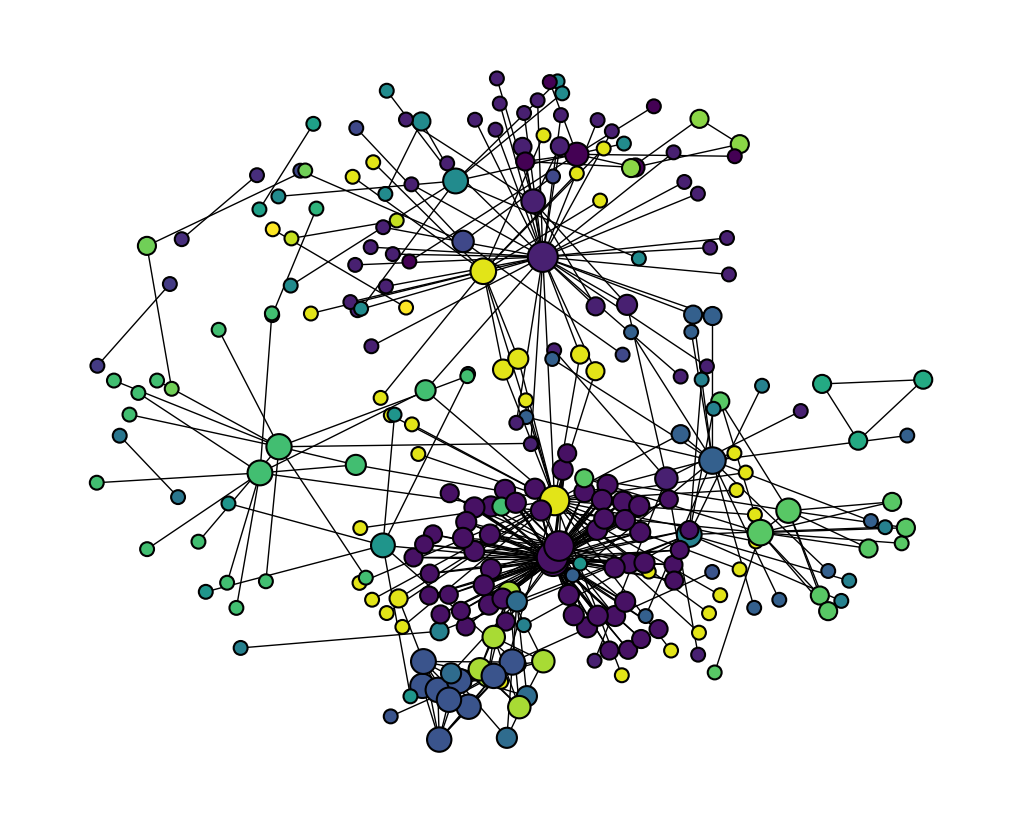

In [ ]:
plt.figure(figsize=(10, 8))

nx.draw(subgraph, pos, node_size=node_sizes, node_color=list(partitions.values()), edge_color='black', font_size=10, node_shape='o', linewidths=1.5, edgecolors='black')

plt.show()

In [ ]:
num_communities = len(set(partitions.values()))
print("Number of communities:", num_communities)

modularity = louvain.modularity(partitions, subgraph)
print("Modularity of the partition:", modularity)

Number of communities: 24
Modularity of the partition: 0.7997017400559392


In [ ]:
from collections import Counter

community_sizes = Counter(partitions.values())

for community_id, size in community_sizes.items():
    print(f"Community {community_id}: Size {size}")

Community 0: Size 7
Community 1: Size 57
Community 2: Size 41
Community 22: Size 37
Community 16: Size 20
Community 5: Size 5
Community 6: Size 11
Community 7: Size 15
Community 10: Size 11
Community 11: Size 11
Community 12: Size 8
Community 14: Size 3
Community 15: Size 2
Community 17: Size 11
Community 18: Size 3
Community 19: Size 3
Community 20: Size 6
Community 21: Size 2
Community 3: Size 2
Community 4: Size 2
Community 8: Size 4
Community 9: Size 2
Community 13: Size 2
Community 23: Size 2


In [ ]:
# Display communities
communities = defaultdict(list)
for node, community_id in partitions.items():
    title = G.nodes[node]['title']
    communities[community_id].append(title)

communities_ordered = dict(sorted(communities.items(), key=lambda item: len(item[1]), reverse=True))

In [ ]:
communities_ordered

{1: ['Dear Mom, Dad & Ethel: World War II through the Eyes of a Radio Man',
  'John Muir: My Life With Nature (Sharing Nature)',
  'The Real Business of Photography',
  'The Holy Earth',
  'Advanced Home Gardening',
  "Southwest Style : A Home-Lover's Guide to Architecture and Design",
  'The Science of Harry Potter: How Magic Really Works',
  'Wham! Bam! Publishing: The Strategic Marketing Plan for Authors and Publishers',
  'Christ and Apollo: The Dimensions of the Literary Imagination',
  'Astrology for Yourself: How to Understand and Interpret Your Own Birth Chart',
  'Big Rigs: The Complete History of the American Semi Truck',
  'Architecture of Spain',
  'The Food Processor Bible',
  'The Whole Foods Allergy Cookbook: Two Hundred Gourmet & Homestyle Recipes for the Food Allergic Family',
  "Once Upon a Time: Illustrations from Fairytales, Fables, Primers, Pop-Ups, and Other Children's Books",
  "John Stanley's Creature Features Movie Guide Strikes Again: An A to Z Encyclopedia to

### Recommender System with Graph Embedding

In [ ]:
node2vec = Node2Vec(G, dimensions=64, walk_length=20, num_walks=200, p=2, q=5, workers=1)

Computing transition probabilities:   0%|          | 0/2217 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:37<00:00,  5.26it/s]


In [ ]:
# train the model on biased rw with a window of 10 (5 nodes before, 5 nodes after):
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [ ]:
def recommend_book_from(book):
    # Get the RecipeId for the given recipe name
    book_id = str(net[net['Title'] == book]['Title'].values[0])

    # Find similar recipes based on the given recipe
    for id in model.wv.most_similar(book_id)[:3]:
        # Retrieve the title of the similar recipe
        similar_book = id[0]
        similarity = id[1]


        # Print the title of the similar recipe and its similarity score
        print(f'{similar_book} --> {similarity:.2f}')

In [ ]:
recommend_book_from("Sackett - The Louis L'amour Collection")

The Creature from Jekyll Island: A Second Look at the Federal Reserve --> 1.00
A Knight to Cherish (Time Passages Romance Series) --> 0.66
Almost Remembered (Almost Texas) (Silhouette Intimate Moments No. 867) --> 0.65


In [ ]:
recommend_book_from('1984')

Why I am Not a Christian --> 0.98
The theory of the leisure class;: An economic study of institutions, --> 0.97
If Life is a Bowl of Cherries - What am I Doing in the Pits? --> 0.97


In [ ]:
recommend_book_from('The Picture of Dorian Gray (Classic Collection (Brilliance Audio))')

Practical Magic --> 0.86
Hamlet (The Shakespeare Folios) --> 0.86
The Time Machine: An Invention --> 0.86


In [ ]:
recommend_book_from('Pride and Prejudice')

The Importance of Being Earnest [with Biographical Introduction] --> 0.89
Their Eyes Were Watching God --> 0.89
Emma (Penguin Readers, Level 4) --> 0.88
